<a href="https://colab.research.google.com/github/mdforhadcse/Data-Science-project/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

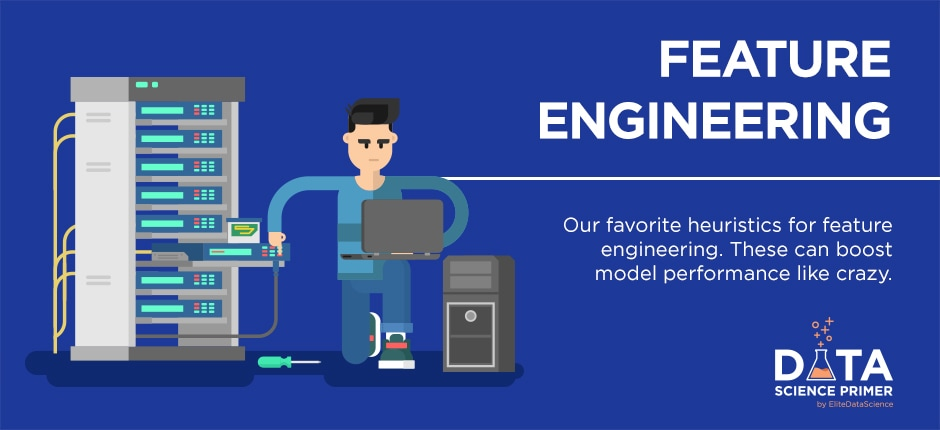

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

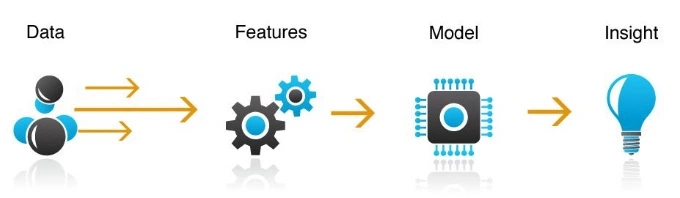

To boost our data model performance and faster, we should do data scalling

##label encoding

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [2]:
#Load dataset and get the clean data
#we discus on Data cleaning project
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/fazlyrabbi77/DataProcessing/master/real-estate.csv')
df.rename(columns = {"NUM_BEDROOMS": "BEDROOMS",  "NUM_BATH":"BATH"},inplace=True) 
df['PID'].fillna(100005000,inplace=True)
df.loc[2,'ST_NUM'] = 197
df.loc[6,'ST_NUM'] = 208

cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

df['BEDROOMS'] = pd.to_numeric(df['BEDROOMS'], errors='coerce')
df['BATH'] = pd.to_numeric(df['BATH'], errors='coerce')
df['SQ_FT'] = pd.to_numeric(df['SQ_FT'], errors='coerce')
df['OWN_OCCUPIED'].fillna(df['OWN_OCCUPIED'].mode()[0], inplace=True)
df['SQ_FT'] = df['SQ_FT'].fillna(df.groupby('BEDROOMS')['SQ_FT'].transform('median'))
df['SQ_FT'] = df['SQ_FT'].fillna(df['SQ_FT'].median())
df.loc[2,'BEDROOMS'] = 1
df.loc[5,'BEDROOMS'] = 1
df.loc[8,'BEDROOMS'] = 3
df['BATH']=df['BATH'].fillna(method='bfill')
df.PID = df.PID.astype('int64') 
df.ST_NUM = df.ST_NUM.astype('int64') 
df.BEDROOMS = df.BEDROOMS.astype('int64') 
df.BATH = df.BATH.astype('int64') 
df.SQ_FT = df.SQ_FT.astype('int64') 
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3,1,1000
1,100002000,197,LEXINGTON,N,3,1,1300
2,100003000,197,LEXINGTON,N,1,1,850
3,100004000,201,BERKELEY,Y,1,2,700
4,100005000,203,BERKELEY,Y,3,2,1600
5,100006000,207,BERKELEY,Y,1,1,800
6,100007000,208,WASHINGTON,Y,2,1,950
7,100008000,213,TREMONT,Y,1,1,700
8,100009000,215,TREMONT,Y,3,2,1800


In [3]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df['ST_NAME']= le.fit_transform(df['ST_NAME']) 
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000,104,2,Y,3,1,1000
1,100002000,197,1,N,3,1,1300
2,100003000,197,1,N,1,1,850
3,100004000,201,0,Y,1,2,700
4,100005000,203,0,Y,3,2,1600
5,100006000,207,0,Y,1,1,800
6,100007000,208,4,Y,2,1,950
7,100008000,213,3,Y,1,1,700
8,100009000,215,3,Y,3,2,1800


##Mapping function

In [4]:
#use of mapping function
mapping = {'Y' :1 , 'N' : 2 }
df['OWN_OCCUPIED'] = df['OWN_OCCUPIED'].map(mapping)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,100001000,104,2,1,3,1,1000
1,100002000,197,1,2,3,1,1300
2,100003000,197,1,2,1,1,850
3,100004000,201,0,1,1,2,700
4,100005000,203,0,1,3,2,1600
5,100006000,207,0,1,1,1,800
6,100007000,208,4,1,2,1,950
7,100008000,213,3,1,1,1,700
8,100009000,215,3,1,3,2,1800


##OneHotEncoder
using get_dummies function

In [5]:
#One Hot Encoding for nominal data
df1 = pd.get_dummies(df, columns=['OWN_OCCUPIED'])
df1

,PID,ST_NUM,ST_NAME,BEDROOMS,BATH,SQ_FT,OWN_OCCUPIED_1,OWN_OCCUPIED_2
0,100001000,104,2,3,1,1000,1,0
1,100002000,197,1,3,1,1300,0,1
2,100003000,197,1,1,1,850,0,1
3,100004000,201,0,1,2,700,1,0
4,100005000,203,0,3,2,1600,1,0
5,100006000,207,0,1,1,800,1,0
6,100007000,208,4,2,1,950,1,0
7,100008000,213,3,1,1,700,1,0
8,100009000,215,3,3,2,1800,1,0


##Min Max normalization
min-max scaling or min-max normalization, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data.

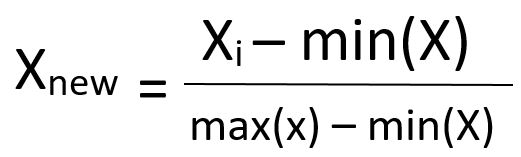

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df),columns=df.columns)
scaled

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,0.000,0.000000,0.50,0.0,1.0,0.0,0.272727
1,0.125,0.837838,0.25,1.0,1.0,0.0,0.545455
2,0.250,0.837838,0.25,1.0,0.0,0.0,0.136364
3,0.375,0.873874,0.00,0.0,0.0,1.0,0.000000
4,0.500,0.891892,0.00,0.0,1.0,1.0,0.818182
5,0.625,0.927928,0.00,0.0,0.0,0.0,0.090909
6,0.750,0.936937,1.00,0.0,0.5,0.0,0.227273
7,0.875,0.981982,0.75,0.0,0.0,0.0,0.000000
8,1.000,1.000000,0.75,0.0,1.0,1.0,1.000000


##standard scaler
The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other words independently for each column of the data)

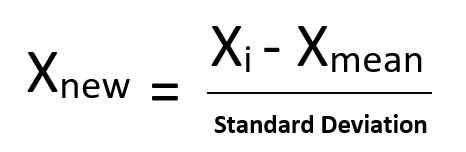

In [7]:
import pandas as pd    
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaledstd = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
df_scaledstd

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,-1.549193,-2.779199,0.312348,-0.534522,1.06066,-0.707107,-0.206195
1,-1.161895,0.096190,-0.390434,1.870829,1.06066,-0.707107,0.589128
2,-0.774597,0.096190,-0.390434,1.870829,-1.06066,-0.707107,-0.603856
3,-0.387298,0.219862,-1.093216,-0.534522,-1.06066,1.414214,-1.001517
4,0.000000,0.281699,-1.093216,-0.534522,1.06066,1.414214,1.384450
5,0.387298,0.405371,-1.093216,-0.534522,-1.06066,-0.707107,-0.736410
6,0.774597,0.436290,1.717911,-0.534522,0.00000,-0.707107,-0.338748
7,1.161895,0.590880,1.015129,-0.534522,-1.06066,-0.707107,-1.001517
8,1.549193,0.652717,1.015129,-0.534522,1.06066,1.414214,1.914665


##Robust Scaler
Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range

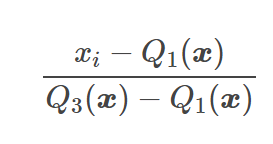

In [8]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
robust_scaled_df = robust.fit_transform(df)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=df.columns)
robust_scaled_df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,BEDROOMS,BATH,SQ_FT
0,-1.00,-9.000000,0.333333,0.0,0.5,0.0,0.1
1,-0.75,-0.545455,0.000000,1.0,0.5,0.0,0.7
2,-0.50,-0.545455,0.000000,1.0,-0.5,0.0,-0.2
3,-0.25,-0.181818,-0.333333,0.0,-0.5,1.0,-0.5
4,0.00,0.000000,-0.333333,0.0,0.5,1.0,1.3
5,0.25,0.363636,-0.333333,0.0,-0.5,0.0,-0.3
6,0.50,0.454545,1.000000,0.0,0.0,0.0,0.0
7,0.75,0.909091,0.666667,0.0,-0.5,0.0,-0.5
8,1.00,1.090909,0.666667,0.0,0.5,1.0,1.7


##Transpose Function
The transpose of a matrix is obtained by moving the rows data to the column and columns data to the rows.

In [9]:
transposed_df=df.transpose()
transposed_df

,0,1,2,3,4,5,6,7,8
PID,100001000,100002000,100003000,100004000,100005000,100006000,100007000,100008000,100009000
ST_NUM,104,197,197,201,203,207,208,213,215
ST_NAME,2,1,1,0,0,0,4,3,3
OWN_OCCUPIED,1,2,2,1,1,1,1,1,1
BEDROOMS,3,3,1,1,3,1,2,1,3
BATH,1,1,1,2,2,1,1,1,2
SQ_FT,1000,1300,850,700,1600,800,950,700,1800
